### 正則化項

### Ridge

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [4]:
# 欠損地対応
df.dropna(inplace=True)


In [5]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [6]:
# データ準備
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]
# 標準化したいけど、まずは数値だけを標準化(数値カラムだけを作成)→次にダミー変数をいれる
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
# ダミー変数作成は数値カラムの作成のあと
X = pd.get_dummies(X, drop_first=True)

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化 数値カラムだけを標準化する
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# モデル学習
ridge = Ridge()
linear = LinearRegression()
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)
# 予測
y_pred = ridge.predict(X_test)
y_pred_linear = linear.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred_linear)

In [7]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

251.01058042384852

In [8]:
# model.coef_

In [9]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [10]:
# 線形回帰 ridgeと比べて、係数が大きい
linear.coef_

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

In [11]:
mean_absolute_error(y_test, y_pred_linear)

255.2902834669945

### 様々なλでのRidgeの精度を比較しよう

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv')
df.dropna(inplace=True)
y_col = 'Salary'
X = df.loc[:, df.columns != y_col]
y = df[y_col]

# 標準化するためにまずは数値カラムを抽出
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()

#　ダミー変数
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

alphas = np.logspace(-3, 3)  # これは大事

scores = []
coefs = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    scores.append(mse)
    coefs.append(model.coef_)


Text(0, 0.5, 'test mse')

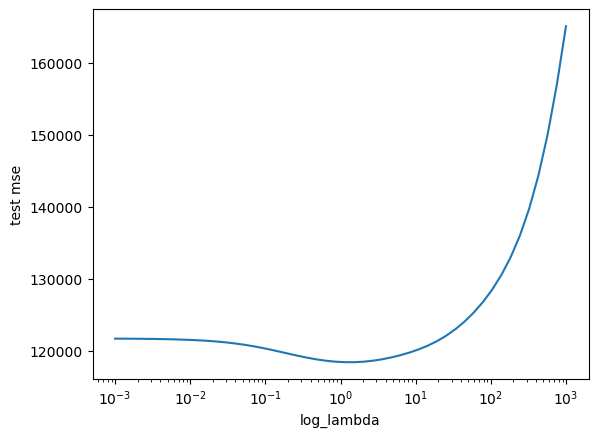

In [25]:
# λ vs MSE
plt.plot(alphas, scores)
plt.xscale('log')
plt.xlabel('log_lambda')
plt.ylabel('test mse')

Text(0, 0.5, 'standardized coefficients')

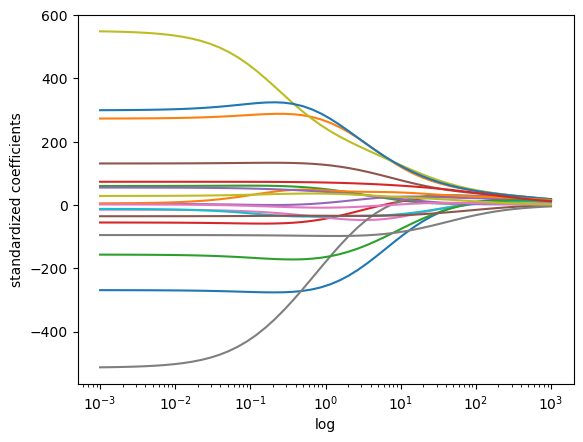

In [31]:
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('log')
plt.ylabel('standardized coefficients')
# λが小さい時は線形回帰とほぼ同じ、λが大きくなると、０に収束する。０になることはない

### Lasso

In [33]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(mae)


117768.9047816135
250.24481877112999


In [34]:
lasso.coef_
# 係数が０になるものがある→予測につかっていない特徴量がある

array([-263.93470404,  267.52882597,   42.60344047,  -33.86419872,
          7.61638806,  125.23251733,  -29.82564501, -239.24447846,
        330.30504107,   -4.11414372,  259.64536978,    0.        ,
       -160.99905107,   71.08401856,   40.14808014,  -30.18012969,
          0.        ,  -93.87340542,   25.7211037 ])

In [35]:
ridge.coef_

array([-255.99352472,  265.41620796,   49.85450911,  -43.4415344 ,
          6.40827279,  126.64463957,  -39.99788141, -180.02267219,
        242.39467113,  -36.09606293,  281.13852012,   46.31799934,
       -164.64027314,   70.88806172,   41.295514  ,  -34.06922615,
         -8.54724705,  -97.91075067,   35.72441367])

### さまざまなλでのLassoのせいどを比較しよう

In [59]:
# alphas
alphas = np.logspace(-3, 3)
mse_list = []
coefs = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.495e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.991e+06, tolerance: 3.232e

Text(0, 0.5, 'test mse')

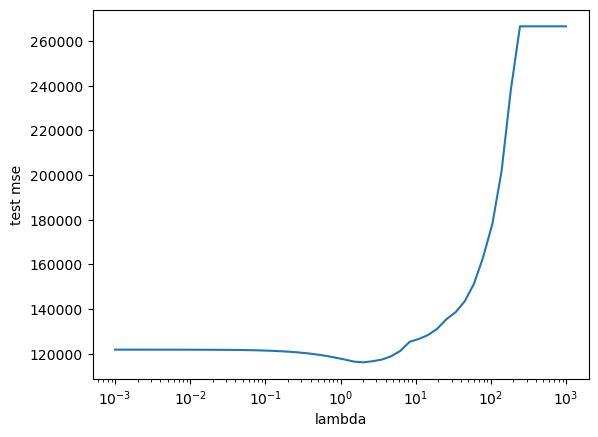

In [60]:
plt.plot(alphas, mse_list)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('test mse')

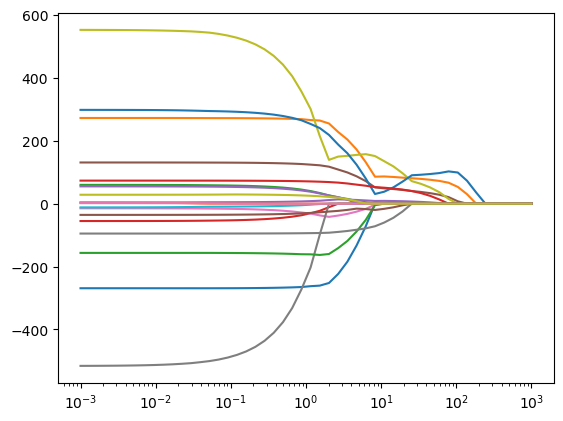

In [62]:
plt.plot(alphas, coefs)
plt.xscale('log')

In [64]:
alphas[np.argmin(mse_list)] # これで学習すれば良い

2.023589647725158

In [66]:
lasso  = Lasso(alpha = alphas[np.argmin(mse_list)])
lasso.fit(X_train, y_train)

Lasso(alpha=2.023589647725158)

In [68]:
pd.DataFrame({
    'coef':lasso.coef_, 
    'columns':X_train.columns.to_list(),
    }
)

,coef,columns
0,-252.192228,AtBat
1,254.955174,Hits
2,26.344767,HmRun
3,-11.164490,Runs
4,11.554622,RBI
5,117.619609,Walks
6,-41.936832,Years
7,-0.000000,CAtBat
8,139.314907,CHits
9,-0.000000,CHmRun
